In [56]:
# ROAD MAP
# DESCONSIDERAR A PRIMEIRA COLUNA
# SEPARA A COLUNA DE PRECO DAS DEMAIS
# FAZER A MULTIPLICACAO DA MATRIX EM SEGUIDA DA INVERSA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from enum import Enum
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

def classificationCut (data):
    data = data.replace("Fair", -2)
    data = data.replace("Good", -1)
    data = data.replace("Very Good", 0)
    data = data.replace("Premium", 1)
    data = data.replace("Ideal", 2)
    return data

def classificationColor (data):
    data = data.replace('D', -3)
    data = data.replace('E', -2)
    data = data.replace('F', -1)
    data = data.replace('G', -0)
    data = data.replace('H', 1)
    data = data.replace('I', 2)
    data = data.replace('J', 3)
    return data

#como fazer com numeros pares?
def classificationClarity (data):
    data = data.replace("I1", -3)
    data = data.replace("SI2", -2)
    data = data.replace("SI1", -1)
    data = data.replace("VS2", 0)
    data = data.replace("VS1", 1)
    data = data.replace("VVS2", 2)
    data = data.replace("VVS1", 3)
    data = data.replace("IF", 4)
    return data

def classificationSet (data):
    data = classificationCut(data)
    data = classificationColor(data)
    data = classificationClarity(data)
    return data

def loadDiamondsTrainingData():
    return pd.read_csv("diamonds-dataset/diamonds-train.csv")

def loadDiamondsTestData():
    return pd.read_csv("diamonds-dataset/diamonds-test.csv")

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


# We get our data, and split it into train and validation

In [57]:
diamondsTrain = loadDiamondsTrainingData()

In [58]:
diamondsCut = diamondsTrain["cut"]
diamondsCutEncoded, diamondsCategories = diamondsCut.factorize()
diamondsCategories

Index(['Ideal', 'Premium', 'Fair', 'Very Good', 'Good'], dtype='object')

In [59]:
diamondsTrain = classificationSet(diamondsTrain)
trainSet, validationSet = split_train_test(diamondsTrain, 0.2)

# First, we get some insight about our data:




In [60]:
diamondsTrain.describe()

,carat,cut,color,clarity,x,y,z,depth,table,price
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797698,0.904556,-0.411089,0.047438,5.731171,5.734044,3.537613,61.744716,57.455582,3932.515562
std,0.473863,1.117100,1.701648,1.642080,1.121454,1.140275,0.694809,1.428341,2.237592,3990.380545
min,0.200000,-2.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,0.000000,-2.000000,-1.000000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,1.000000,0.000000,0.000000,5.700000,5.710000,3.520000,61.800000,57.000000,2401.000000
75%,1.040000,2.000000,1.000000,1.000000,6.540000,6.540000,4.030000,62.500000,59.000000,5322.000000
max,5.010000,2.000000,3.000000,4.000000,10.740000,58.900000,8.060000,78.200000,95.000000,18823.000000


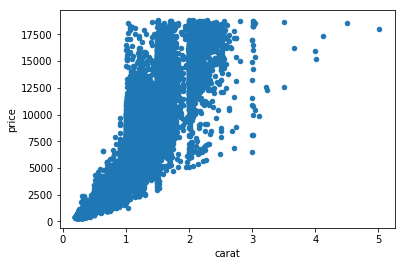

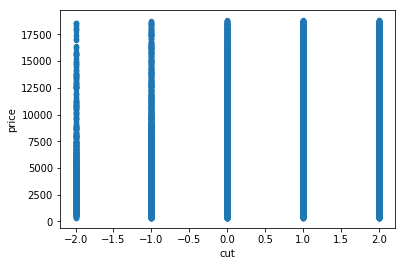

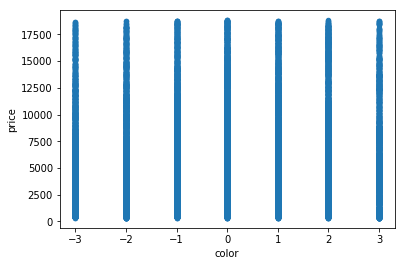

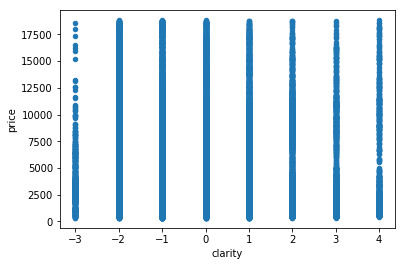

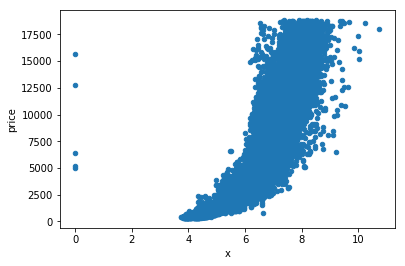

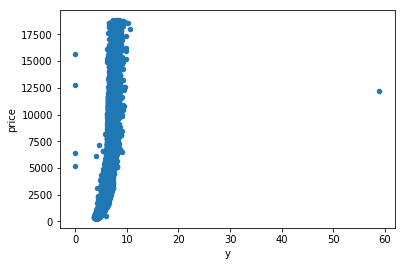

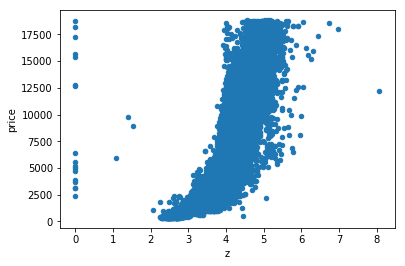

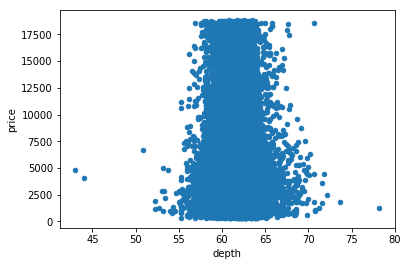

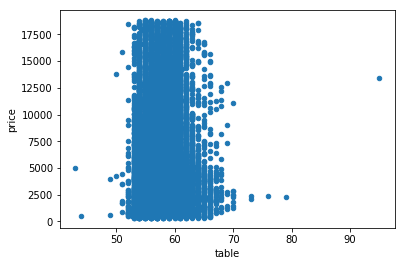

In [61]:
diamondsTrain.plot(kind="scatter", x="carat", y="price")
diamondsTrain.plot(kind="scatter", x="cut", y="price")
diamondsTrain.plot(kind="scatter", x="color", y="price")
diamondsTrain.plot(kind="scatter", x="clarity", y="price")
diamondsTrain.plot(kind="scatter", x="x", y="price")
diamondsTrain.plot(kind="scatter", x="y", y="price")
diamondsTrain.plot(kind="scatter", x="z", y="price")
diamondsTrain.plot(kind="scatter", x="depth", y="price")
diamondsTrain.plot(kind="scatter", x="table", y="price")

In [62]:
corr_matrix = diamondsTrain.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
carat      0.921541
x          0.885136
z          0.874730
y          0.867810
color      0.170961
table      0.126694
depth     -0.014127
cut       -0.052402
clarity   -0.144417
Name: price, dtype: float64

## Preparing the data for the Machine Learning proccess

### We will be using a exponential function to describe x, y and z behaviour

In [63]:
print(diamondsTrain)
# diamondsTrain = diamondsTrain.values

       carat  cut  color  clarity     x     y     z  depth  table  price
0       1.62    2      2        0  7.53  7.58  4.69   62.1   55.0  10501
1       0.30    1      0       -1  4.39  4.35  2.57   58.8   60.0    574
2       1.37    2     -1        1  7.28  7.22  4.32   59.6   57.0  11649
3       0.33   -2      1        2  4.40  4.32  2.84   65.1   59.0    922
4       0.32    0     -1        0  4.43  4.48  2.62   58.8   62.0    602
5       0.51    1     -2       -2  5.15  5.12  3.22   62.7   52.0   1205
6       1.50   -1      1        0  7.22  7.27  4.61   63.6   58.0  10291
7       0.85    2      0        1  6.09  6.11  3.77   61.8   55.0   4373
8       0.33    2     -1        1  4.46  4.49  2.74   61.2   56.0    723
9       1.10    2      0        1  6.69  6.65  4.09   61.3   54.0   6535
10      0.51    0     -2        2  5.20  5.23  3.13   60.0   58.0   2365
11      0.54    2     -2        0  5.24  5.27  3.24   61.7   55.0   1754
12      1.51    1      0        0  7.20  7.31  4.55

#### Insert x, y and z squared values to the matrix

In [64]:
x_sqrd = diamondsTrain['x'] ** 2
y_sqrd = diamondsTrain['y'] ** 2
z_sqrd = diamondsTrain['z'] ** 2

diamondsTrain.insert(loc = 5, column = 'x_sqrd', value = x_sqrd)
diamondsTrain.insert(loc = 7, column = 'y_sqrd', value = y_sqrd)
diamondsTrain.insert(loc = 9, column = 'z_sqrd', value = z_sqrd)


# x_sqrd = [row[4] for row in diamondsTrain]
# y_sqrd = [row[5] for row in diamondsTrain]
# z_sqrd = [row[6] for row in diamondsTrain]

# x_sqrd = np.square(x_sqrd)
# y_sqrd = np.square(y_sqrd)
# z_sqrd = np.square(z_sqrd)

# np.insert(diamondsTrain, 4, x_sqrd, axis = 1)
# np.insert(diamondsTrain, 6, y_sqrd, axis = 1)
# np.insert(diamondsTrain, 8, z_sqrd, axis = 1)

print(diamondsTrain)

       carat  cut  color  clarity     x   x_sqrd     y   y_sqrd     z  \
0       1.62    2      2        0  7.53  56.7009  7.58  57.4564  4.69   
1       0.30    1      0       -1  4.39  19.2721  4.35  18.9225  2.57   
2       1.37    2     -1        1  7.28  52.9984  7.22  52.1284  4.32   
3       0.33   -2      1        2  4.40  19.3600  4.32  18.6624  2.84   
4       0.32    0     -1        0  4.43  19.6249  4.48  20.0704  2.62   
5       0.51    1     -2       -2  5.15  26.5225  5.12  26.2144  3.22   
6       1.50   -1      1        0  7.22  52.1284  7.27  52.8529  4.61   
7       0.85    2      0        1  6.09  37.0881  6.11  37.3321  3.77   
8       0.33    2     -1        1  4.46  19.8916  4.49  20.1601  2.74   
9       1.10    2      0        1  6.69  44.7561  6.65  44.2225  4.09   
10      0.51    0     -2        2  5.20  27.0400  5.23  27.3529  3.13   
11      0.54    2     -2        0  5.24  27.4576  5.27  27.7729  3.24   
12      1.51    1      0        0  7.20  51.8400  7